## Station Quiz - Week 3

Grading Rubric (per question):  
2 points if complete and correct  
1 point if incomplete or incorrect  
0 points if no attempt made  

The following questions should be completed with your mates at the station you decided to sit at today. Your station should designate one person to be the one who submits (commits/pushes) the answers to the quiz in their repo. We'll call this person the **designated submitter**. You all have 50 minutes (i.e. the end of class) to complete these questions. Do not change anything in this file above the line.

***

**#0** Pull this ipynb file from your respective **assignments_section_sp20** repo; either **assignments_section2_sp20** or **assignments_section3_sp20**. Copy it into your personal repo to begin answering the questions, but rename the file as station_quiz_week_03_Netid.ipynb with your Netid. (GitHub)

**#1** Using Markdown syntax (not SAS syntax), make a list of the first and last names all mates (including yourself) at your station. Be sure to write the designated submitter's name in bold font. (Markdown)  

**#2** Using the visualization below, describe what's happening in the plot and the relationship among the variables in it.
![](https://uofi.box.com/shared/static/egzi1oi4nctrlvubanzwieeou38y76ln.png)

**#3**  Now, physically move to another station and ask one person the same questions in **Problem 2** (above). Write down their first and last name as well as their answers to those questions get credit for this **Problem 3** with Markdown syntax.  

**#4** Look through the Datasets file which contains basic information about the **CCSO Bookings Data** (see course website). Read about it and use SAS and the DATA step to import the data from the URL. Rename the data object as "ccso". (SAS, Accessing and Importing Data)

**#5** With SAS, create a new subset of the CCSO Bookings Data that: 
  - creates a new variable "hoursserved" that records the time spent in jail in hours (this variable does not already exist)
  - creates a new variable "yearsserved" that records the time spent in jail in years 
  - creates an indicator variable called "nationalmedtimeserved" which equals "greater than" if years in jail > 1.3
  - filter so that we only keep observations that are hoursserved > 24.
Now, show only the first 10 rows of the subset and the variables: nationalmedtimeserved, hoursserved, employmentstatus, race, sex, and released reason. (SAS, Data Wrangling)  

**#6** Beginning with the CCSO Bookings Data in **Problem 4**, use the code below to create the contingency table with measures of association. Please describe the measure of the association between monthbin and whitebin and compare it to the Spearman correlation. (SAS, Data Wrangling, Data Descriptives, Markdown)
```
data ccso;
 set ccso;
 if daysinjail>30 then monthbin=1;
  else monthbin=0;
 if race="White" then whitebin=1;
  else whitebin=0;
run;
proc freq data=ccso;
 tables monthbin*whitebin / chisq;
 ods select chisq;
run;
proc corr data=ccso spearman;
 var monthbin whitebin;
 ods select spearmancorr;
run;
```

**#7** Are the male and female distributions of daysinjail far from normal? You must show the QQplot for both groups and answer the question in words. (SAS, Data Descriptives, Data Visualization, Markdown)

**#8** Using SAS code and beginning with the original CCSO Bookings Data (**Problem 4**), create a new subset that
  - filters on the "Cash Bond Posted" as the released reason
  - creates a new indicator variable that either equals 1 when the daysinjail variable >30 or equals 0 otherwise.  
Now create a bar plot that shows the frequency of racial groups among the levels of the new indicator variable. (SAS, Data Wrangling, Data Visualization, Visual Design Principles)

**#9** Using SAS code and beginning with the original CCSO Bookings Data (**Problem 4**) recreate the plot below. This plot uses the visual design ideas from Knaflic's **Storytelling with Data** book. (SAS, Data Visualization, Visual Design Principles)
![](https://uofi.box.com/shared/static/hfihdwa9649y64018jd5ggxzeyt0b3kd.png)

**#10** Using SAS code and beginning with the original CCSO Bookings Data (**Problem 4**), recreate the plot below. This plot uses the visual design ideas from Knaflic's **Storytelling with Data** book. Also, describe the relationship among the variables in the plot. (SAS, Data Visualization, Visual Design Principles, Markdown)
![](https://uofi.box.com/shared/static/re3g9swcoabd6yayhq4kckbbjhnrjmee.png)

**#00** The **designated submitter** should commit and push the file to their repo with the commit message "All Done".

**Problem 1**

- *Josh Janda*
- Other names left out for privacy

**Problem 2**

This plot is describing the default rate by year from 1970 to 2010, emphasizing the period of time before online banking and once online banking became prevalent (after around 1988). The independent variable (x-axis) is the disbursement year, while the dependent variable (y-axis) is the default rate.

Once the online era begins, there is a strong decrease in default rate. However, the recession in 2008 resulted in a spike during which the default rate increased.

The country average is approximately 40% over the 40 year time period. The Illinois (blue line) and the overall United States (red line) default rates are closely associated, but there is a large discrepancy from 1985 to 1990 when Illinois has a higher default rate (approximately 70%) versus the United States average (approximately 40%) during those years. 

**Problem 3**

Name: 

This is the line plot. The plot shows the default rates in Illinois, comparing to the default rates in all states, from 1970 to 2010, for time periods before online banking and after it is introduced. We can see from the plot that the online banking is introduced approximately around 1988. The x-axis is disbursement year. The y-axis is default rates in percentage.

There are two lines in the plot, the blue line represents the default rate in Illinois and the red line represents the default rate in all states.

We can see from the trend of the two lines that before online banking was introduced, the default rate in Illinois variates from the default rate of all states to a certain amount. It has two drops, one is around 1977 and the other one is around 1981. However, after the online banking was introduced, the default rate of Illinois is approximately the same as the default rate of all states and they both increased from 1990 to around 2007, and then the Recession took place and they both dropped.

In [1]:
/*Problem 4*/
filename jail1 url  "https://uofi.box.com/shared/static/9elozjsg99bgcb7gb546wlfr3r2gc9b7.csv" termstr=crlf;

data ccso;
length city $40. state $40. race $30. INCARCERATIONREASON $80. crimecode $80. employmentstatus $80. 
       citizenship $40. school $80. occupation $80. maritalstatus $40. chargestatute $80.
       prisonertype $40. arrestagency $80. releasedreason $80.;
 infile jail1 dsd firstobs=2 missover;
 input BOOKINGDATE :mmddyy10. BOOKINGNUMBER BOOKINGTIME :time20.3 CUSTODYCLASS $ EMPLOYMENTSTATUS $
       INCARCERATIONREASON $ JACKETNUMBER JACKETTYPE $ PRISONERTYPE $ RELEASEDDATE :mmddyy10.
       RELEASEDREASON $ RELEASEDTIME :time20.3 CHARGESTATUTE $ CRIMECODE $ STATUTETYPE $
       CITY $ RACE $ SEX $ STATE $ ZIPCODE 
       CITIZENSHIP $ MARITALSTATUS $ MILITARY $ OCCUPATION $ SCHOOL $
       ARRESTAGENCY $ AgeatArrest AgeatRelease BookingDateTime :anydtdtm40. ReleaseDateTime :anydtdtm40. 
       DaysinJail Hours Minutes Seconds;
format BOOKINGDATE mmddyy10. RELEASEDDATE mmddyy10. bookingtime time20.3 releasedtime time20.3 bookingdatetime datetime. 
       releasedatetime datetime.;
run;

SAS Connection established. Subprocess id is 3178



In [22]:
/*Problem 5*/
data ccso2;
set ccso;
hours_served = abs((BookingDateTime - ReleaseDateTime)/60);
years_served = abs((BookingDateTime - ReleaseDateTime)/31536000);
if years_served > 1.3 then nationalmedtimeserved = "greater than";
else nationalmedtimeserved = "less than";
if hours_served > 24;
run;

proc print data=ccso2 (obs=10);
var hours_served nationalmedtimeserved employmentstatus race sex releasedreason;
run;

Obs,hours_served,nationalmedtimeserved,employmentstatus,race,SEX,releasedreason
1,83532.37,less than,Employed - Full Time,White,Male,Sentenced (transfer) to State Corrections Y
2,83532.37,less than,Employed - Full Time,White,Male,Sentenced (transfer) to State Corrections Y
3,772.27,less than,Student,White,Male,Cash Bond Posted
4,772.27,less than,Student,White,Male,Cash Bond Posted
5,772.27,less than,Student,White,Male,Cash Bond Posted
6,845.20,less than,Unemployed,Black,Male,Cash Bond Posted
7,282.97,less than,Student,White,Male,Cash Bond Posted
8,282.97,less than,Student,White,Male,Cash Bond Posted
9,206.13,less than,Employed - Full Time,White,Male,Cash Bond Posted
10,206.13,less than,Employed - Full Time,White,Male,Cash Bond Posted


In [3]:
/*Problem 6*/
data ccso;
 set ccso;
 if daysinjail>30 then monthbin=1;
  else monthbin=0;
 if race="White" then whitebin=1;
  else whitebin=0;
run;
proc freq data=ccso;
 tables monthbin*whitebin / chisq;
 ods select chisq;
run;
proc corr data=ccso spearman;
 var monthbin whitebin;
 ods select spearmancorr;
run;

Looking at the output above between the two variables `monthbin` and `whitebin`, we are able to see the Spearman correlation as well as association between the variables.

Looking at the Chi-Square test, we can reject the null hypothesis that the variables are not associated.

For the association, the values of the Phi Coefficient, Contingency Coefficient, and Cramer's V are very small (close to zero in absolute value). This tells us that these variables have a very weak association between each other.

Compared to the Spearman Correlation Coefficient, this value is also very small (close to zero in absolute value). This tells us that the correlation rank using a nonparametric function is very small between the two variables. 

Overall, these tables tell us that these variables have a very weak association as well as very weak correlation.


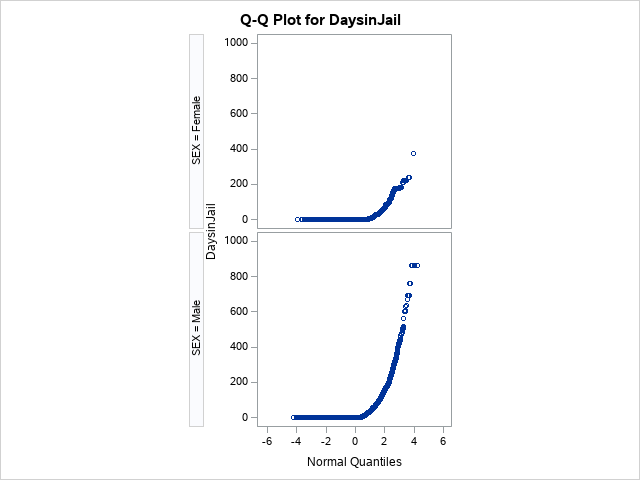

In [2]:
/*Problem 7*/
proc univariate data=ccso;
    class sex;
    var daysinjail;
    qqplot daysinjail /square;
    ods select qqplot;
run;

Looking at the Q-Q Plot's above for both female and male of the daysinjail variable, I can see that these distributions are not normal. The Q-Q Plot's are not linear, meaning they are not created from a normal distribution.


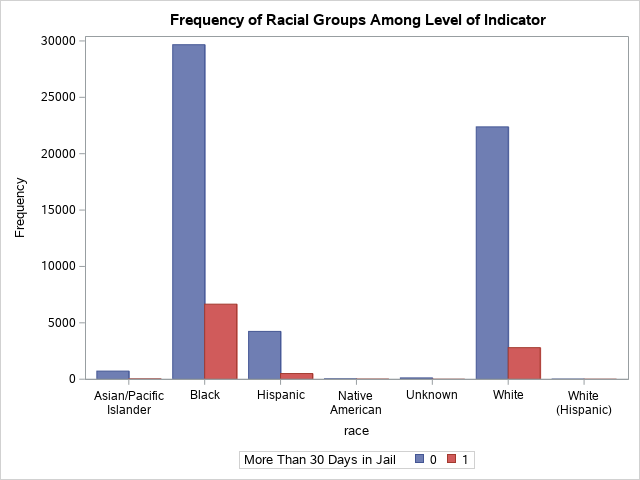

In [23]:
/*Problem 8*/
data ccsot2;
set ccso;
RELEASEDREASON = "Cash Bond Posted";
if DaysInJail > 30 then indicator = 1;
else indicator = 0;

run;

proc sgplot data = ccsot2;
vbar Race / group = indicator groupdisplay = cluster;
title1 "Frequency of Racial Groups Among Level of Indicator";
label indicator = "More Than 30 Days in Jail";

run;


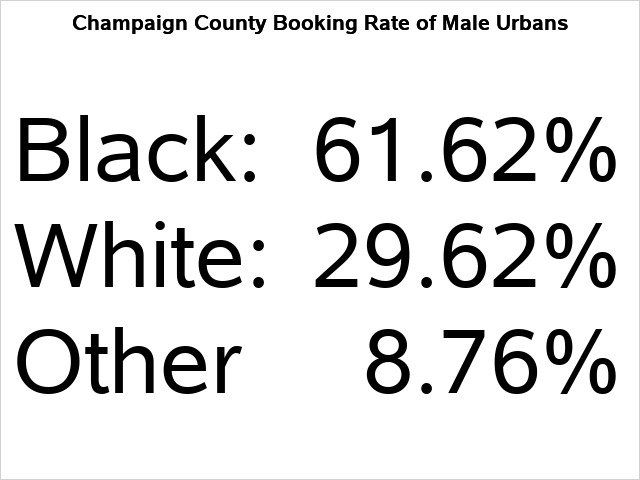

In [25]:
/*Problem 9*/

data ccso9;
    set ccso;
    length race2 $12;
    if race = "Black" then
        race2 = "Black";
    else
        race2 = "NonBlack";
run;

proc sgplot data=ccso9 noborder noautolegend nowall;
title1 height=15pt "Champaign County Booking Rate of Male Urbans" ;
 scatter x=race2 y=race2 / markerattrs=(color='white');
 inset ("Black: " = "61.62%" "White: " ="29.62%" "Other" = "8.76%" ) / textattrs = (SIZE=65 COLOR='black');
 xaxis display=none;
 yaxis display=none;
run;
title1;

In [20]:
/*Problem 10*/
data ccso3;
    set ccso;
    length race2 $12;
    if race = "Black" then
        race2 = "Black";
    else
        race2 = "NonBlack";
run;


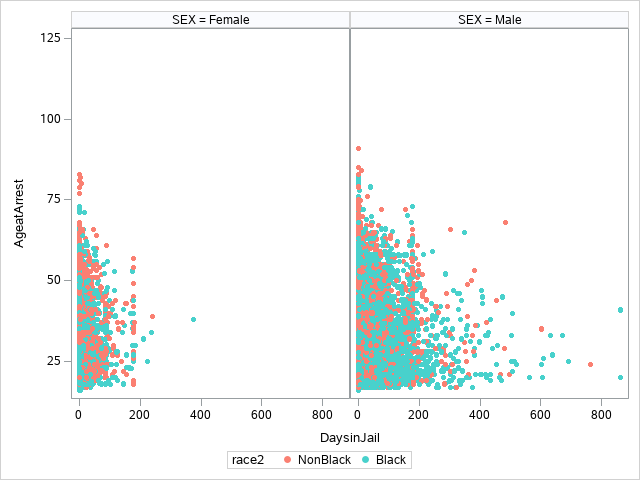

In [21]:
data attrmap1;
 input id $ value $ markercolor $ fillcolor $;
 datalines;
 myid Black CX48D1CC CX48D1CC
 myid NonBlack CXFA8072 CXFA8072
 ;
run;
proc sgpanel data=ccso3 dattrmap=attrmap1;
    panelby sex;
    scatter x=DaysinJail y=AgeatArrest
        / jitter group=race2 markerattrs=(symbol=circlefilled) attrid=myid;
run;

There are more males in jail in general, and of them, there is a higher ratio of black to non-black. In terms of days in jail, men tend to spend more time in jail than females, but when comparing age of arrest, there is not much of a difference between the spread of females and males. 